In [72]:
import numpy as np      #Importing required packages
import pandas as pd      
import os
import matplotlib.pyplot as plt #visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.metrics import plot_confusion_matrix
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import plot_precision_recall_curve

In [73]:
data= pd.read_csv("train.csv")   #Reading the dataset and visualizing the data heads
data.head(5)                      #and visualizing the data heads

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [75]:
data.duplicated().sum()#Duplicating the dataset

0

In [76]:
data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [77]:
data.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

# Data Visualization

Finding out which values each column of objects has; except zipcode, name, thumbnail_url and neighborhood which does not make sense.

In [78]:
for column in data.columns:
  if (data[column].dtype) == 'object' and column != 'zipcode' and column != 'name' and column != 'thumbnail_url':  
    print(column,"\n/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*")
    print(data[column].unique())
    print("\n/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*")

property_type 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
room_type 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
['Entire home/apt' 'Private room' 'Shared room']

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
amenities 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
first_review 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
['2016-06-18' '2017-08-05' '2017-04-30' ... '2012-10-23' '2011-06-07'
 '2010-12-01']

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
host_has_profile_pic 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
['t' nan 'f']

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
host_identity_verified 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
['t' 'f' nan]

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
host_response_rate 
/*\*/*\*/*\*/

Visualization of the 'log_price' according to 'neighbourhood' and the 'review_scores_rating' affecting it.
With the joint plot we can see the correlation between the two features.

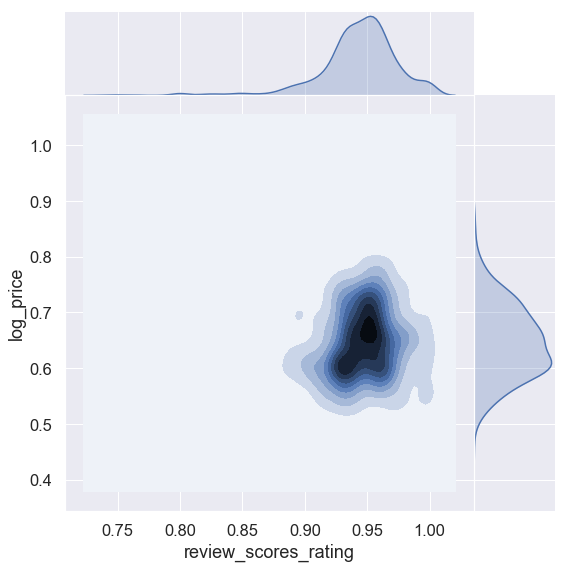

In [79]:
dataframe=pd.pivot_table(data, index = 'neighbourhood', values=["log_price","review_scores_rating"])
#to normalize
dataframe["log_price"]=dataframe["log_price"]/max(dataframe["log_price"])
dataframe["review_scores_rating"]=dataframe["review_scores_rating"]/max(dataframe["review_scores_rating"])
sns.jointplot(dataframe.review_scores_rating,dataframe.log_price,kind="kde",height=8,space=0)
plt.savefig('graph.png')
plt.show()

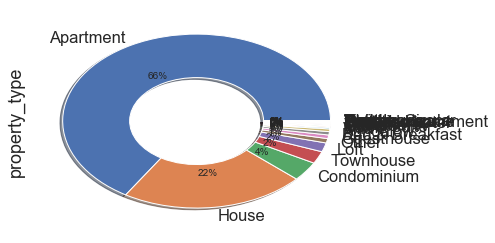

In [80]:
data["property_type"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count         74111
unique           35
top       Apartment
freq          49003
Name: property_type, dtype: object


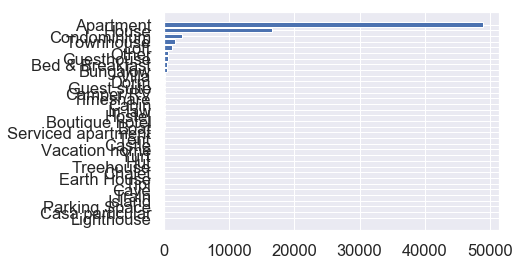

In [81]:
x = list(data["property_type"].value_counts().keys())
x = x[::-1]
y = list(data["property_type"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["property_type"].describe())

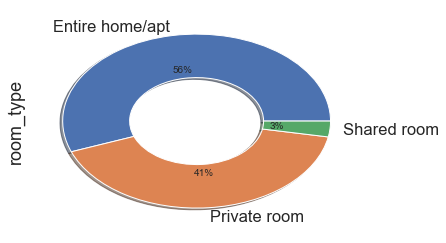

In [82]:
data["room_type"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count               74111
unique                  3
top       Entire home/apt
freq                41310
Name: room_type, dtype: object


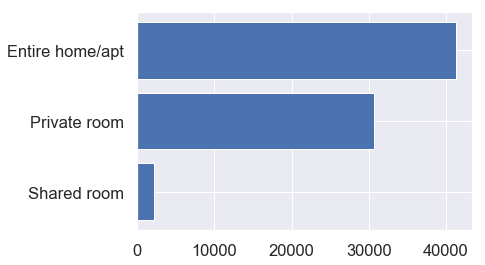

In [83]:
x = list(data["room_type"].value_counts().keys())
x = x[::-1]
y = list(data["room_type"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["room_type"].describe())

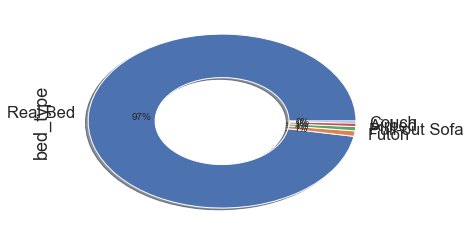

In [84]:
data["bed_type"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count        74111
unique           5
top       Real Bed
freq         72028
Name: bed_type, dtype: object


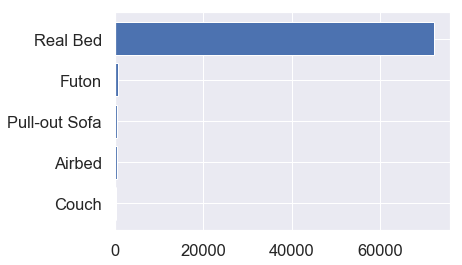

In [85]:
x = list(data["bed_type"].value_counts().keys())
x = x[::-1]
y = list(data["bed_type"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["bed_type"].describe())

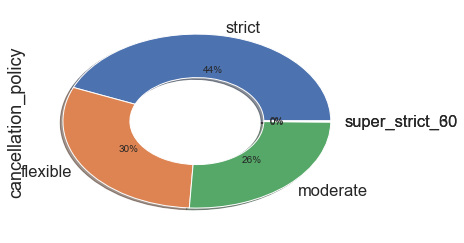

In [86]:
data["cancellation_policy"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count      74111
unique         5
top       strict
freq       32374
Name: cancellation_policy, dtype: object


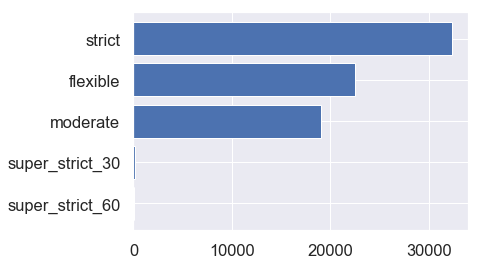

In [87]:
x = list(data["cancellation_policy"].value_counts().keys())
x = x[::-1]
y = list(data["cancellation_policy"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["cancellation_policy"].describe())

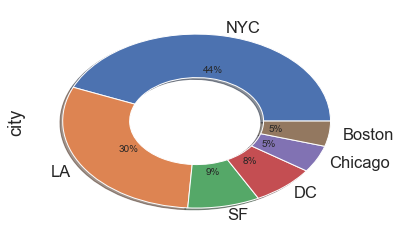

In [88]:
data["city"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count     74111
unique        6
top         NYC
freq      32349
Name: city, dtype: object


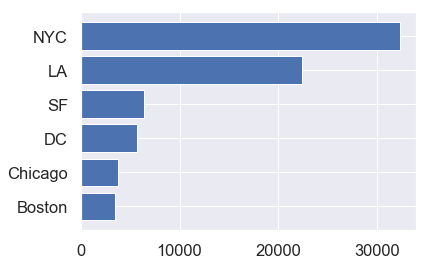

In [89]:
x = list(data["city"].value_counts().keys())
x = x[::-1]
y = list(data["city"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["city"].describe())

Visualising the boolean features all together:

In [90]:
data_boolean = data[["instant_bookable", "host_identity_verified", "host_has_profile_pic", "cleaning_fee"]]

In [91]:
#converting the bool feature tothe string
data_boolean['cleaning_fee'] = data_boolean['cleaning_fee'].map({True: 't', False: 'f'})

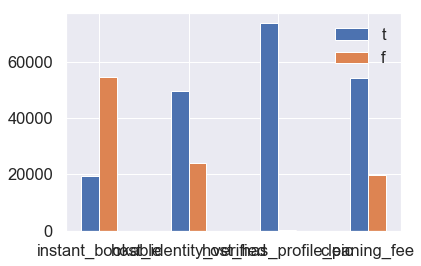

In [92]:
zeros = [data_boolean[column].value_counts()['t'] for column in data_boolean.columns]
ones = [data_boolean[column].value_counts()['f'] for column in data_boolean.columns]
n = len(data_boolean.columns)
plt.bar(np.arange(n)-0.1, zeros, width=0.2, label='t')
plt.bar(np.arange(n)+0.1, ones, width=0.2, label='f')
plt.xticks(np.arange(n), data_boolean.columns)
plt.legend()
plt.show()

In [93]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=data, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)



Violin Plot for Price Distribution in Various cities:

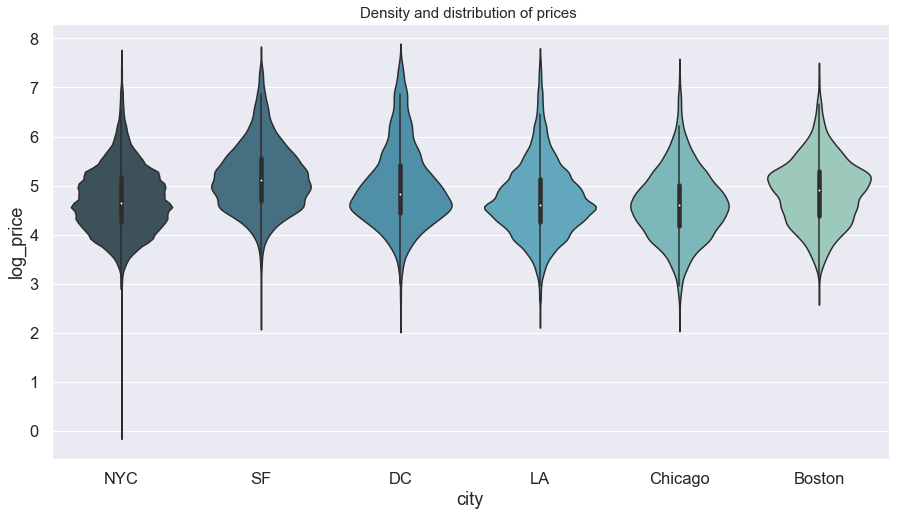

In [94]:
plot_violinplot("city","log_price")

Violin Plot for Price Distribution in Various room_types:

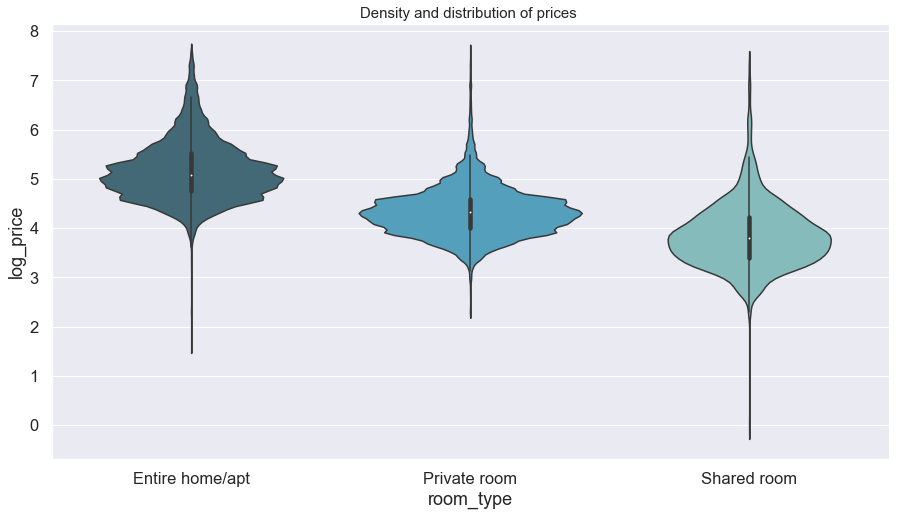

In [95]:
plot_violinplot("room_type","log_price")

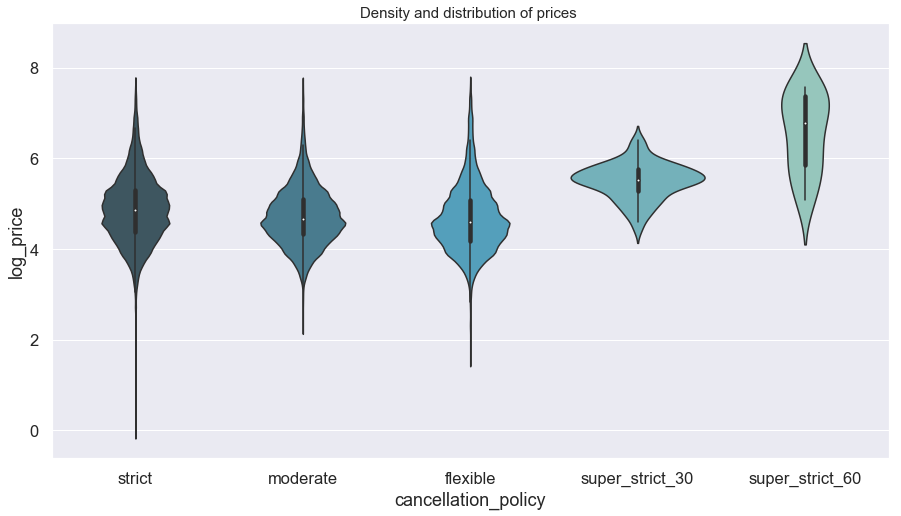

In [96]:
plot_violinplot("cancellation_policy","log_price")

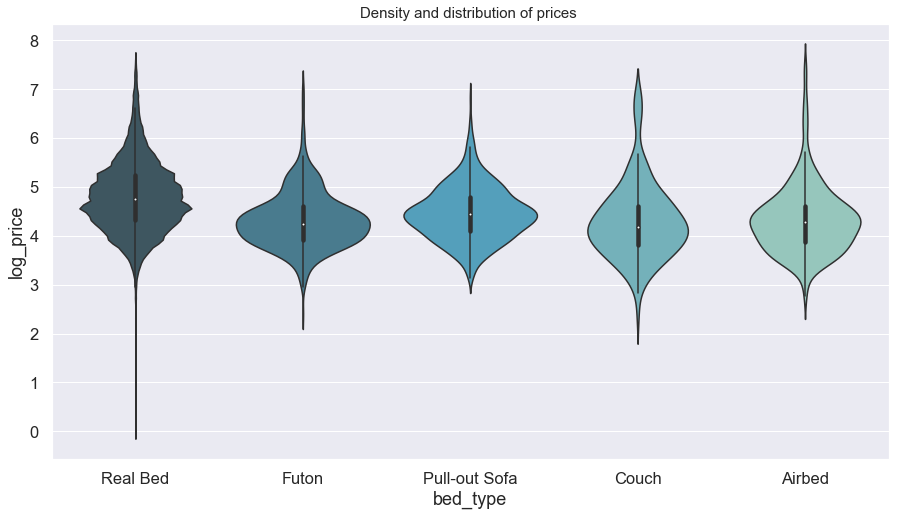

In [97]:
plot_violinplot("bed_type","log_price")

Distribution of the Accommodates

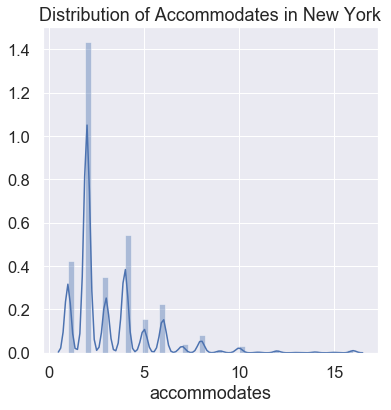

In [98]:
plt.figure(figsize=(6, 6))
sns.distplot(data['accommodates'])
plt.title('Distribution of Accommodates in New York')
plt.show()

Most Expensive and The Cheapest Neighbourhoods:

In [99]:
a = data.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=True).head(15)
d = data.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False).head(15)

Text(0.5,1,'The most expensive neighbourhood')

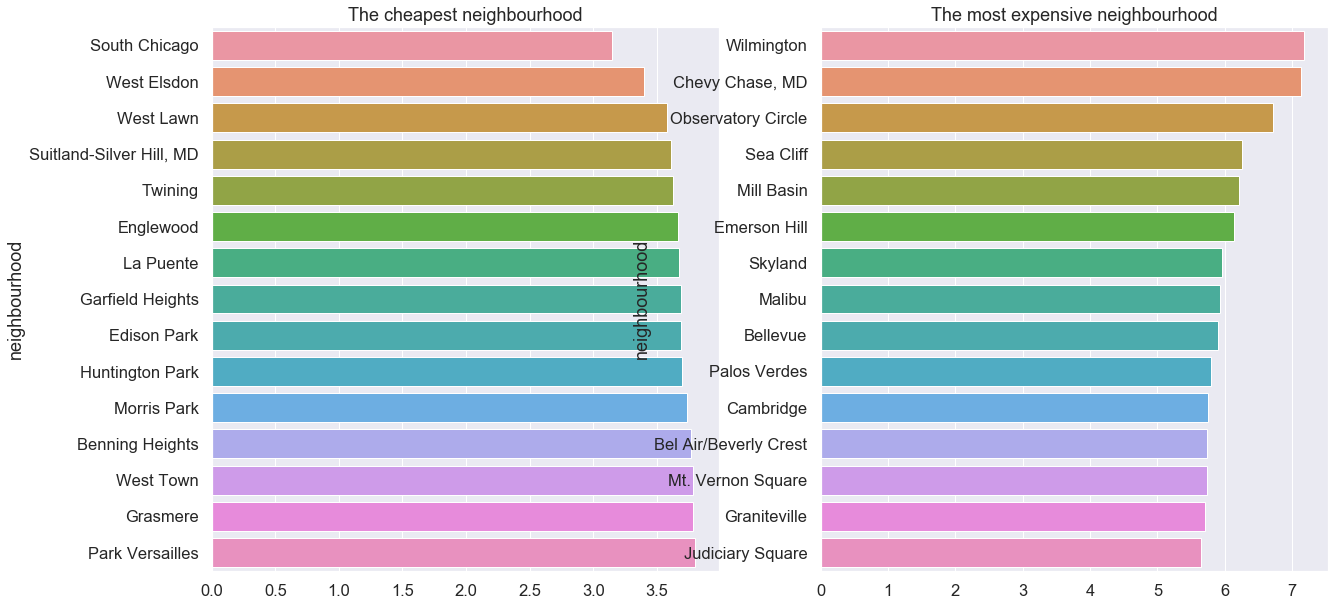

In [100]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('The cheapest neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2)
ax2.set_title('The most expensive neighbourhood')

Distribution of Room Types in Each City:

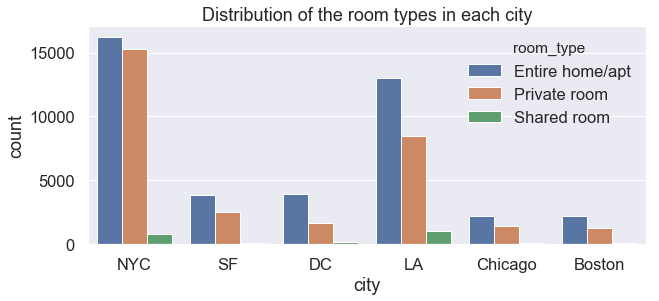

In [101]:
plt.figure(figsize=(10,4))
sns.countplot(data['city'], hue=data['room_type'])
plt.title('Distribution of the room types in each city')
plt.show()

NYC has the largest number of rooms. Mostly the room types in NYC is Entire home/apt.

Correlation Graphics Between Each Column and the Price

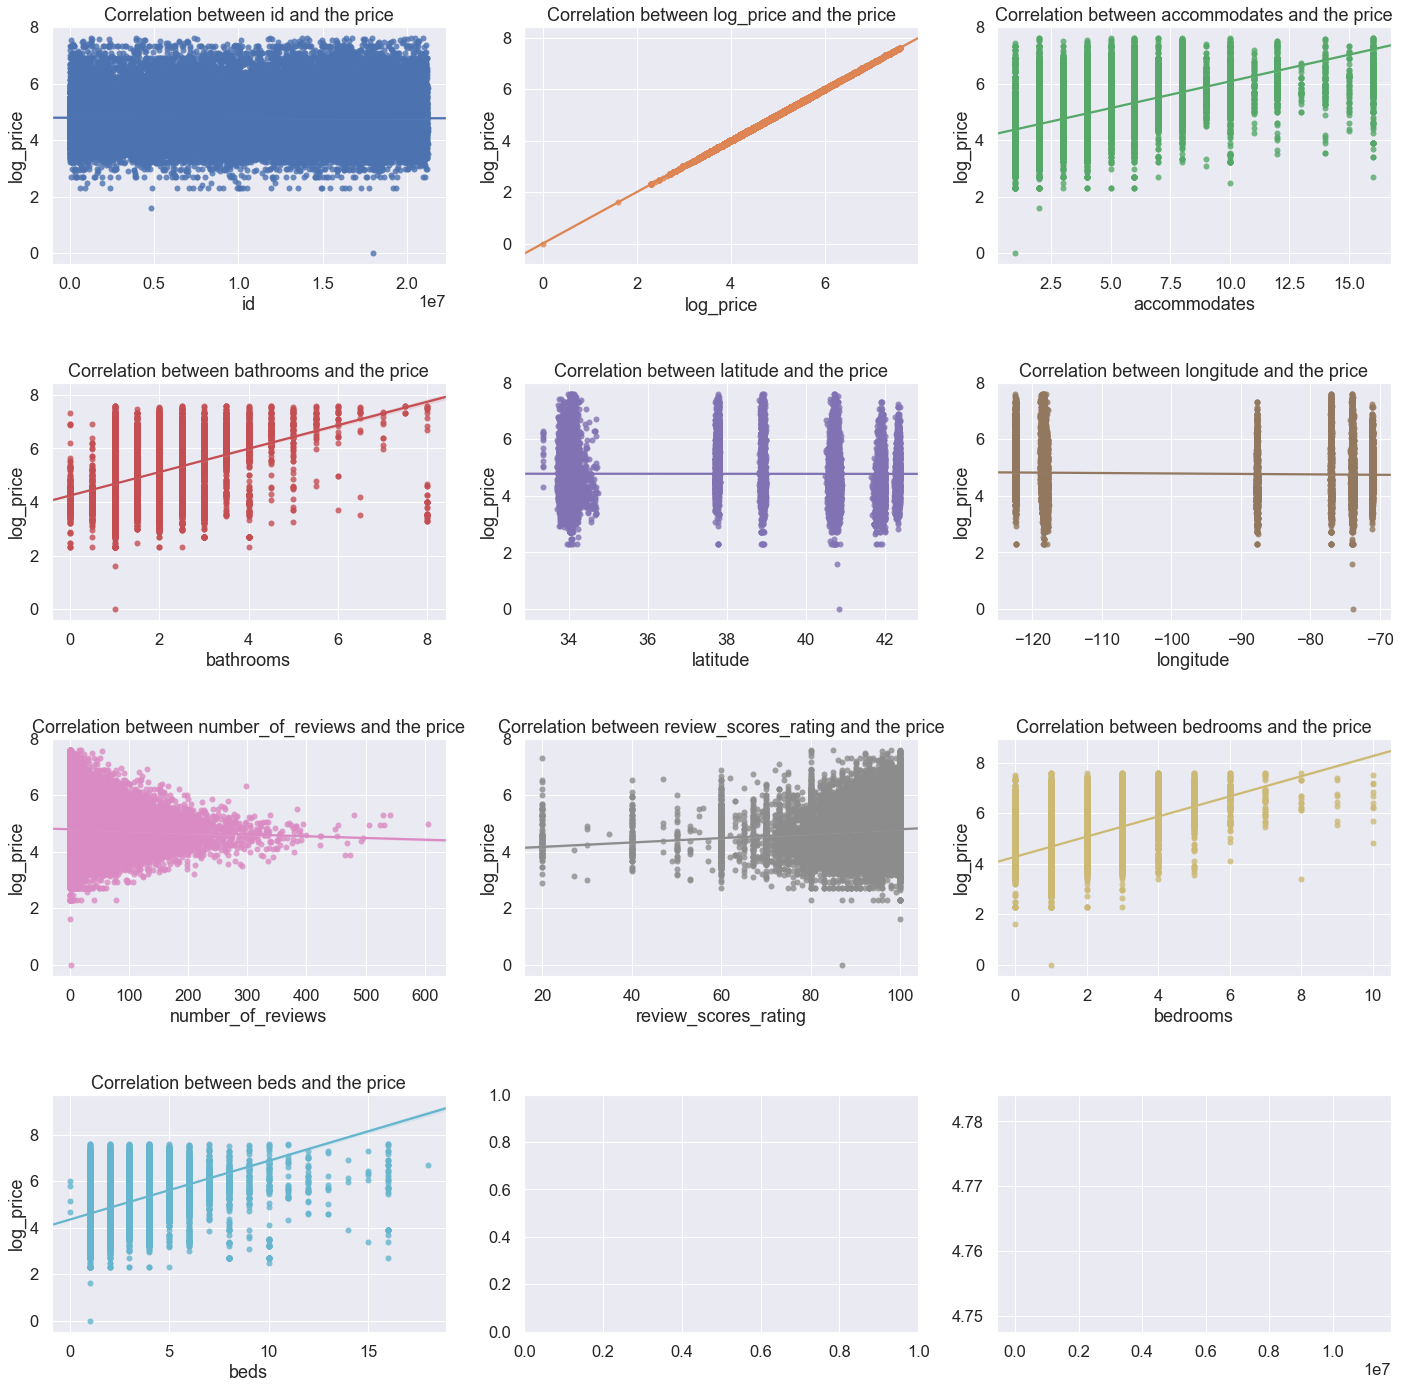

In [102]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
nrows = int(len(newdf.columns) / 3) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(24, 6*nrows))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), newdf.columns):
  
  sns.regplot(x=name, y='log_price', data=newdf, ax=ax)
  ax.set_title(f"Correlation between {name} and the price")

plt.show()

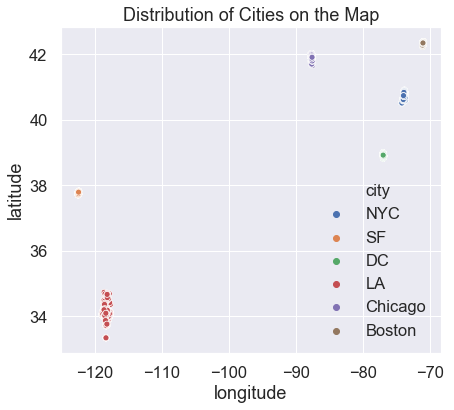

In [103]:
fig = plt.figure(figsize=(15,6))
ax2 = fig.add_subplot(122)
sns.scatterplot(data['longitude'], data['latitude'], hue=data['city'], ax=ax2)
ax2.set_title('Distribution of Cities on the Map')
plt.show()

In [104]:
import folium
from folium.plugins import FastMarkerCluster

latitudes = np.array(data['latitude'])
longitudes = np.array(data['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m

# Handling Missing Data

Case 1. Some columns are not needed for the operation, So they'll be easily dropped.

Case 2. There are a few options for filling in missing values in columns with numeric values, and I chose mean permutation.

Case 3. There's an exception for 'host response rate', which requires converting Percentage to decimal before permuting the mean.

Case 4. Missing values will be replaced with False in the case of Booleans.

In [105]:
data.drop(['id','description','first_review','last_review','host_since','host_has_profile_pic','name','thumbnail_url','zipcode','neighbourhood'], axis=1, inplace=True) 

In [106]:
#Case 2:
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)
data['review_scores_rating'].fillna(data['review_scores_rating'].mean(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace=True)
data['beds'].fillna(data['beds'].mean(), inplace=True)

#Case 3:
data['host_response_rate'] = data['host_response_rate'].str[:-1].astype('float') / 100.0
data['host_response_rate'].fillna(data['host_response_rate'].mean(), inplace=True)

#Case 4:
data['host_identity_verified'] = data['host_identity_verified'].fillna(method='ffill')

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_identity_verified  74111 non-null  object 
 11  host_response_rate      74111 non-null  float64
 12  instant_bookable        74111 non-null  object 
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [108]:
# Finding out the correlation between the features
corr = data.corr()
corr

log_price  accommodates  bathrooms  cleaning_fee  \
log_price              1.000000      0.567574   0.355019      0.111191   
accommodates           0.567574      1.000000   0.505112      0.182306   
bathrooms              0.355019      0.505112   1.000000      0.053679   
cleaning_fee           0.111191      0.182306   0.053679      1.000000   
host_response_rate    -0.005748      0.043242   0.005949      0.093006   
latitude              -0.002193     -0.078309  -0.137770     -0.060913   
longitude             -0.047529     -0.085160  -0.134835     -0.068505   
number_of_reviews     -0.032470      0.041964  -0.041306      0.110204   
review_scores_rating   0.074822     -0.015006   0.008934      0.028085   
bedrooms               0.473054      0.709108   0.589629      0.105365   
beds                   0.441767      0.809992   0.525292      0.131430   

                      host_response_rate  latitude  longitude  \
log_price                      -0.005748 -0.002193  -0.047529   
accommodates                    0.043242 -0.078309  -0.085160   
bathrooms                       0.005949 -0.137770  -0.134835   
cleaning_fee                    0.093006 -0.060913  -0.068505   
host_response_rate              1.000000  0.007387  -0.012783   
latitude                        0.007387  1.000000   0.896065   
longitude                      -0.012783  0.896065   1.000000   
number_of_reviews               0.117549 -0.017642  -0.050009   
review_scores_rating            0.061340 -0.028966  -0.042875   
bedrooms                        0.018536 -0.059127  -0.076066   
beds                            0.038482 -0.080226  -0.082075   

                      number_of_reviews  review_scores_rating  bedrooms  \
log_price                     -0.032470              0.074822  0.473054   
accommodates                   0.041964             -0.015006  0.709108   
bathrooms                     -0.041306              0.008934  0.589629   
cleaning_fee                   0.110204              0.028085  0.105365   
host_response_rate             0.117549              0.061340  0.018536   
latitude                      -0.017642             -0.028966 -0.059127   
longitude                     -0.050009             -0.042875 -0.076066   
number_of_reviews              1.000000              0.011179 -0.035107   
review_scores_rating           0.011179              1.000000  0.009681   
bedrooms                      -0.035107              0.009681  1.000000   
beds                           0.031102             -0.024215  0.709102   

                          beds  
log_price             0.441767  
accommodates          0.809992  
bathrooms             0.525292  
cleaning_fee          0.131430  
host_response_rate    0.038482  
latitude             -0.080226  
longitude            -0.082075  
number_of_reviews     0.031102  
review_scores_rating -0.024215  
bedrooms              0.709102  
beds                  1.000000

In [109]:
corr.shape

(11, 11)

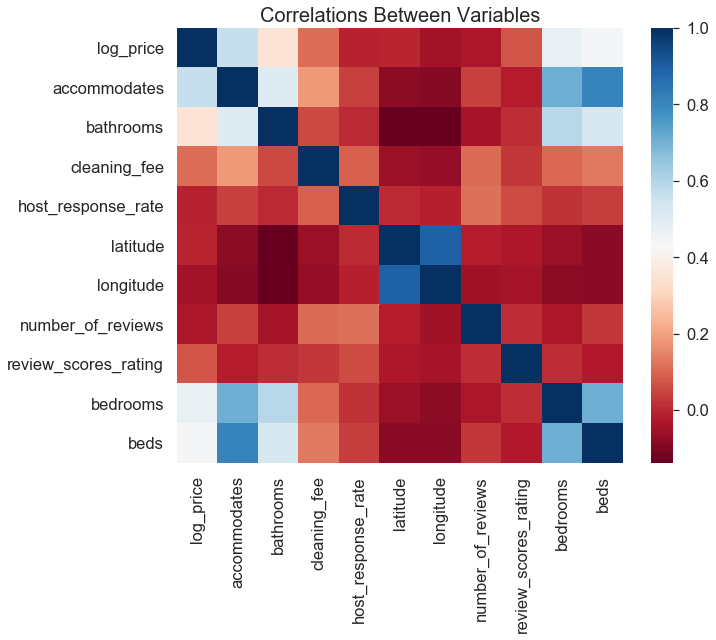

In [110]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=20)
plt.show()

Splitting The data set

In [111]:
data.head()

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city host_identity_verified  \
0  Real Bed              strict          True  NYC                      t   
1  Real Bed              strict          True  NYC                      f   
2  Real Bed            moderate          True  NYC                      t   
3  Real Bed            flexible          True   SF                      t   
4  Real Bed            moderate          True   DC                      t   

   host_response_rate instant_bookable   latitude   longitude  \
0             0.94352                f  40.696524  -73.991617   
1             1.00000                t  40.766115  -73.989040   
2             1.00000                t  40.808110  -73.943756   
3             0.94352                f  37.772004 -122.431619   
4             1.00000                t  38.925627  -77.034596   

   number_of_reviews  review_scores_rating  bedrooms  beds  
0                  2            100.000000       1.0   1.0  
1                  6             93.000000       3.0   3.0  
2                 10             92.000000       1.0   3.0  
3                  0             94.067365       2.0   2.0  
4                  4             40.000000       0.0   1.0

In [112]:
category_var = data.select_dtypes(include = 'object')
num_var = data.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  8
Number of numerical features are:  11


In [113]:
#Label encoding across multiple columns in scikit-learn
#https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [114]:
data_encoded = MultiColumnLabelEncoder(columns = ['room_type','amenities','host_identity_verified','cancellation_policy','property_type','bed_type','instant_bookable','city','cleaning_fee']).fit_transform(data)

In [115]:
data_encoded.head(5)

log_price  property_type  room_type  amenities  accommodates  bathrooms  \
0   5.010635              0          0       6142             3        1.0   
1   5.129899              0          0       6269             7        1.0   
2   4.976734              0          0      21345             5        1.0   
3   6.620073             17          0      38854             4        1.0   
4   4.744932              0          0      55413             2        1.0   

   bed_type  cancellation_policy  cleaning_fee  city  host_identity_verified  \
0         4                    2             1     4                       1   
1         4                    2             1     4                       0   
2         4                    1             1     4                       1   
3         4                    0             1     5                       1   
4         4                    1             1     2                       1   

   host_response_rate  instant_bookable   latitude   longitude  \
0             0.94352                 0  40.696524  -73.991617   
1             1.00000                 1  40.766115  -73.989040   
2             1.00000                 1  40.808110  -73.943756   
3             0.94352                 0  37.772004 -122.431619   
4             1.00000                 1  38.925627  -77.034596   

   number_of_reviews  review_scores_rating  bedrooms  beds  
0                  2            100.000000       1.0   1.0  
1                  6             93.000000       3.0   3.0  
2                 10             92.000000       1.0   3.0  
3                  0             94.067365       2.0   2.0  
4                  4             40.000000       0.0   1.0

Overall distribution of all the features:

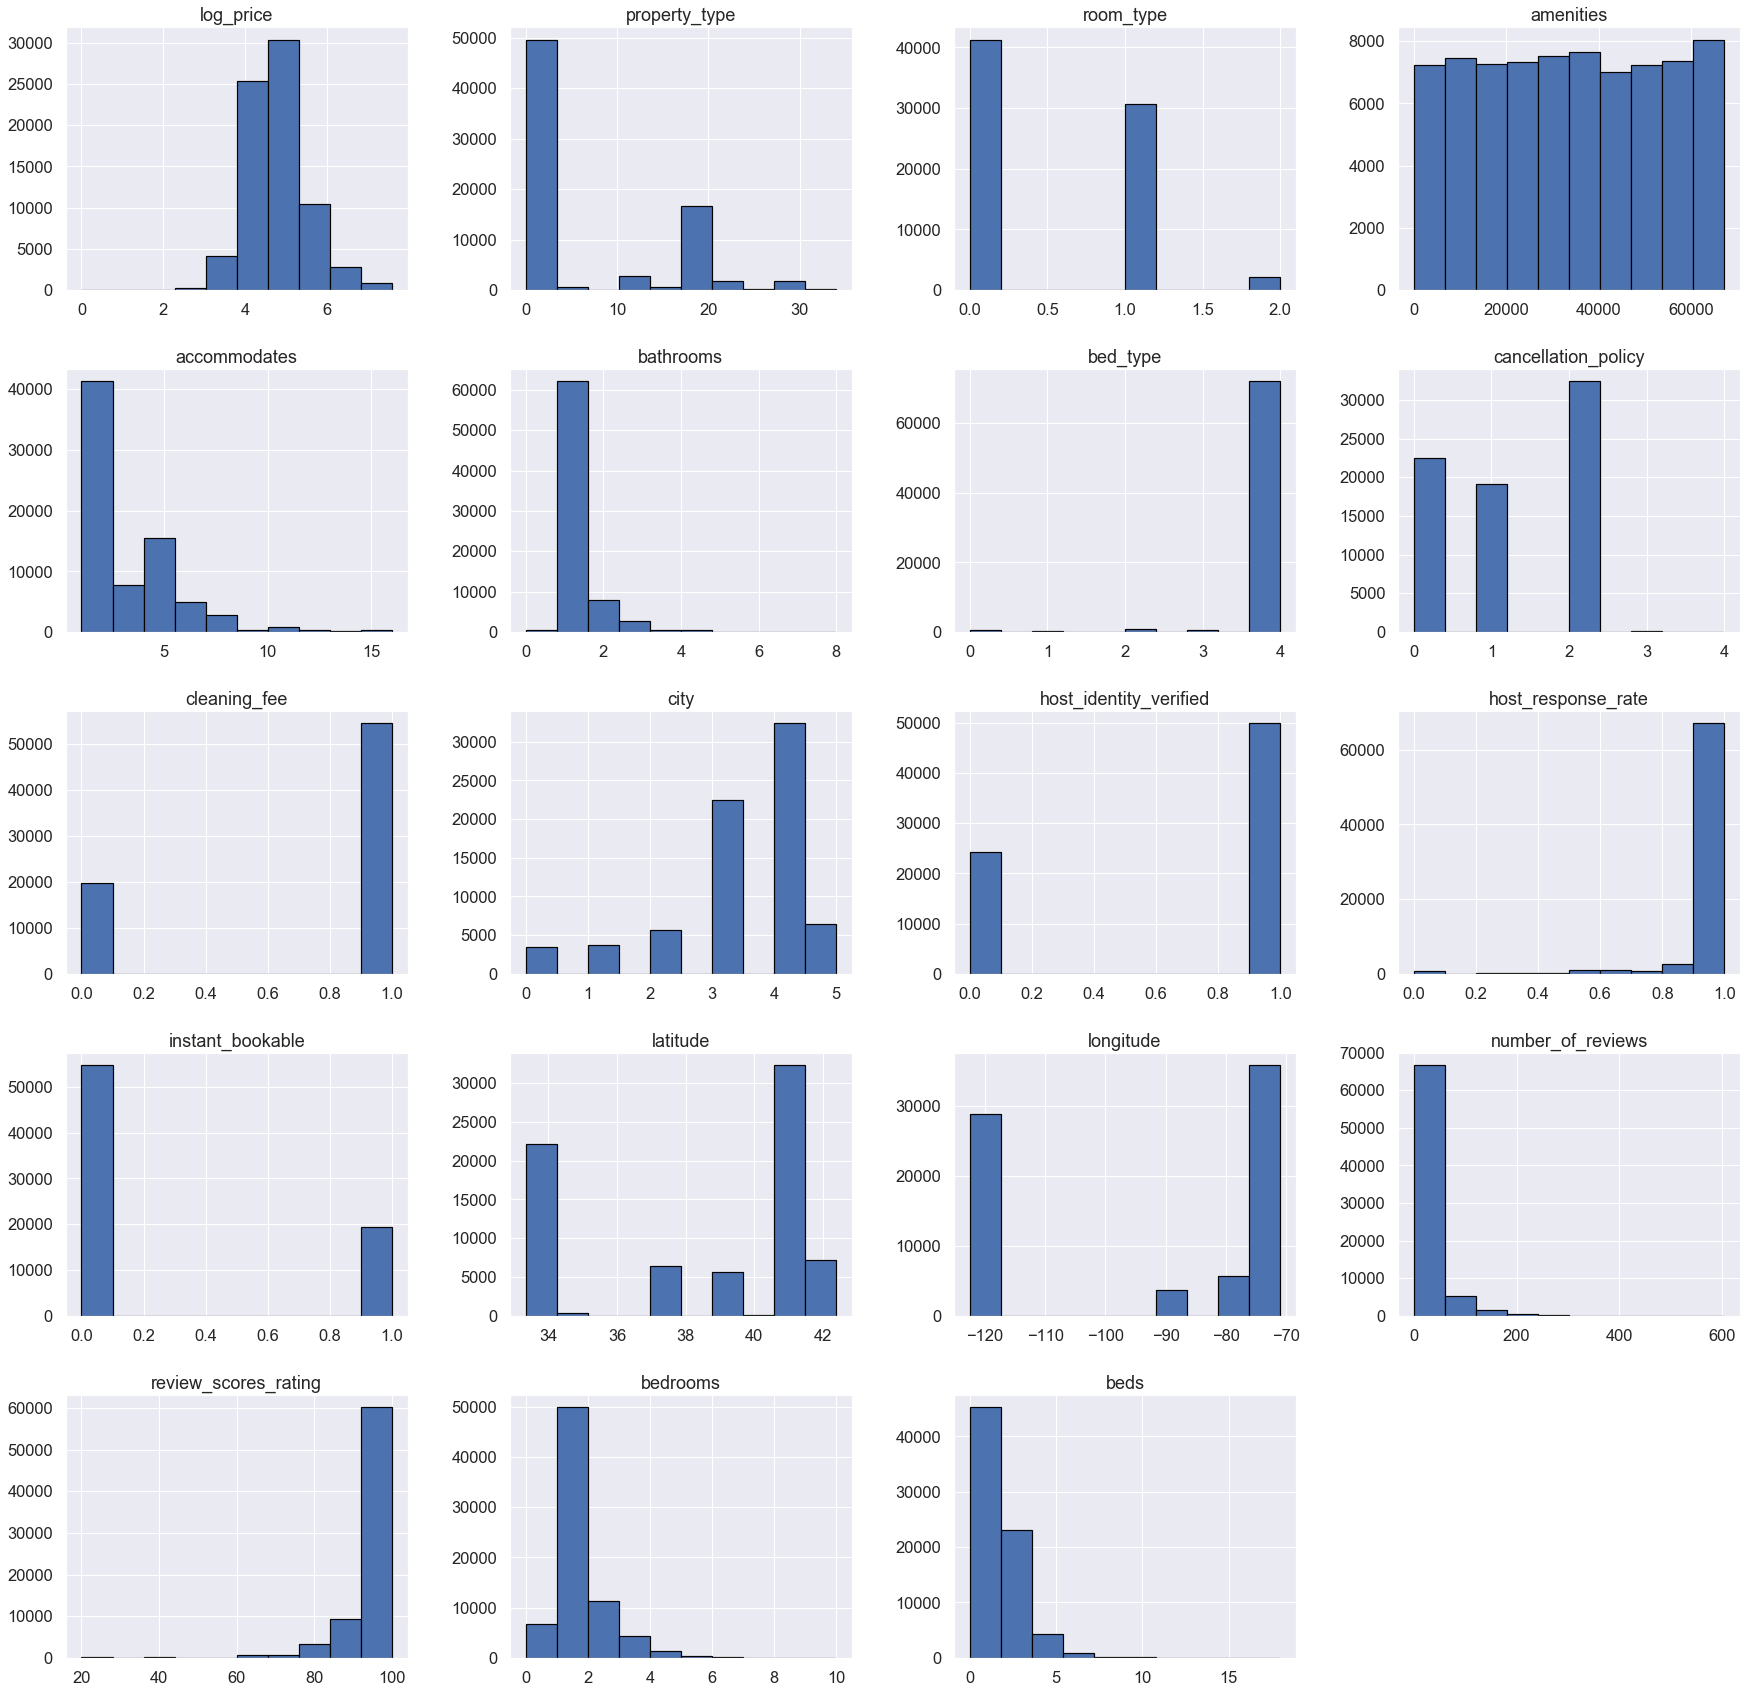

In [116]:
data_encoded.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

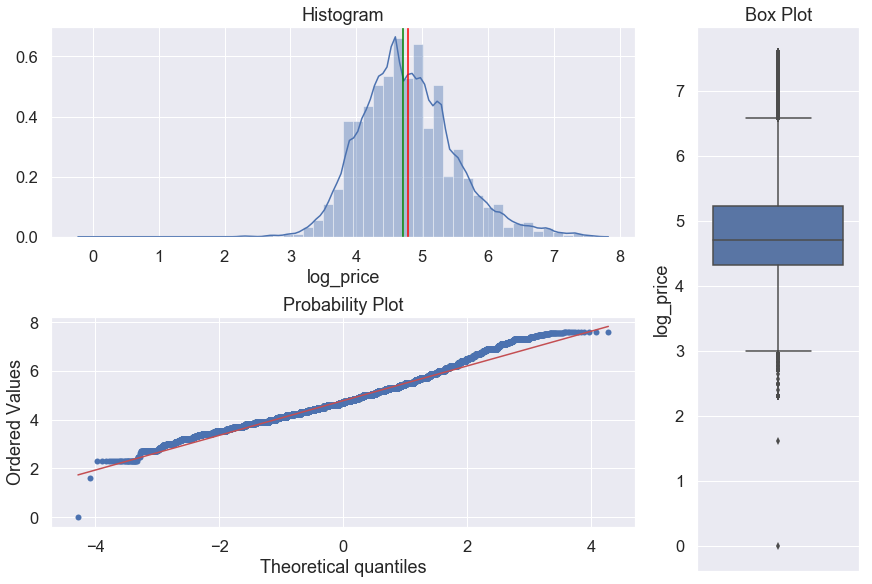

In [117]:
import matplotlib.gridspec as gridspec
from scipy import stats

def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(data_encoded.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = data_encoded[feature].mean(), c = 'red')
    plt.axvline(x = data_encoded[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(data_encoded.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(data_encoded.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(data_encoded, 'log_price')

Red line in histogram indicates the mean of the Price and the Green line indicates the median



For the probability plot, the red line represents those points which would have been plotted for y-axis points if those were normally distributed. But the blue points represents the actual scenario. 

In [118]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", data_encoded['log_price'].skew())

Skewness of the SalesPrice is 0.5146954132526429


Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution.


In [119]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data_encoded)

In [120]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(['log_price'], axis = 1)
y = data_encoded['log_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"There are {X_train.shape[0]} traning data")
print(f"There are {X_test.shape[0]} test data")

X.head()

There are 59288 traning data
There are 14823 test data


property_type  room_type  amenities  accommodates  bathrooms  bed_type  \
0              0          0       6142             3        1.0         4   
1              0          0       6269             7        1.0         4   
2              0          0      21345             5        1.0         4   
3             17          0      38854             4        1.0         4   
4              0          0      55413             2        1.0         4   

   cancellation_policy  cleaning_fee  city  host_identity_verified  \
0                    2             1     4                       1   
1                    2             1     4                       0   
2                    1             1     4                       1   
3                    0             1     5                       1   
4                    1             1     2                       1   

   host_response_rate  instant_bookable   latitude   longitude  \
0             0.94352                 0  40.696524  -73.991617   
1             1.00000                 1  40.766115  -73.989040   
2             1.00000                 1  40.808110  -73.943756   
3             0.94352                 0  37.772004 -122.431619   
4             1.00000                 1  38.925627  -77.034596   

   number_of_reviews  review_scores_rating  bedrooms  beds  
0                  2            100.000000       1.0   1.0  
1                  6             93.000000       3.0   3.0  
2                 10             92.000000       1.0   3.0  
3                  0             94.067365       2.0   2.0  
4                  4             40.000000       0.0   1.0

# MACHINE LEARNING

Our goal is to forecast the price depending on the dataset provided. We must perform a regression task; because price is a continuous variable. As a result, we'll use regression models.

We're not looking for accuracy; because we're working on a regression problem rather than a classification one. Our primary metric will be mean squared error, which we will attempt to reduce; using techniques such as hyperparameter tuning.



# Linear regression

Training the model

In [49]:
from sklearn.linear_model import LinearRegression
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [50]:
from sklearn.model_selection import GridSearchCV


params = {"fit_intercept": [True, False],
                 "n_jobs": [-1, 1, 2],
                 "copy_X": [True, False],
              "normalize": [True, False],
               "positive": [True, False]
             }
gs_LR = GridSearchCV(estimator=LinearRegression(),
                      param_grid=params,
                      cv=5)
gs_LR.fit(X_train, y_train)
gs_LR.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': True,
 'positive': False}

In [51]:
# Create a Linear regressor with best parameters
lr = LinearRegression(copy_X= True,fit_intercept= True,n_jobs= -1,normalize= True,positive= False)

# Train the model using the training sets 
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [52]:
# Value of y intercept
lr.intercept_

4.781523427966155

In [53]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

Attribute Coefficients
0            property_type   0.00861903
1                room_type    -0.336231
2                amenities    0.0275247
3             accommodates     0.184309
4                bathrooms    0.0874045
5                 bed_type  -0.00454679
6      cancellation_policy   0.00535935
7             cleaning_fee   -0.0304252
8                     city    0.0662666
9   host_identity_verified   -0.0133999
10      host_response_rate   -0.0206756
11        instant_bookable   -0.0190937
12                latitude     0.132253
13               longitude    -0.101822
14       number_of_reviews   -0.0245257
15    review_scores_rating    0.0413526
16                bedrooms      0.12184
17                    beds   -0.0583313

Model Evaluation

In [54]:
# Model prediction on train data
y_pred = lr.predict(X_train)

In [55]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5343254983996306
Adjusted R^2: 0.5341840730165668
MAE: 0.36795595708351164
MSE: 0.23975970644256234
RMSE: 0.48965263855366115


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

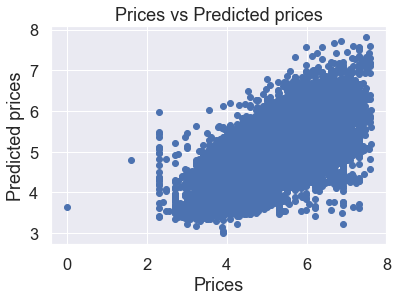

In [56]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

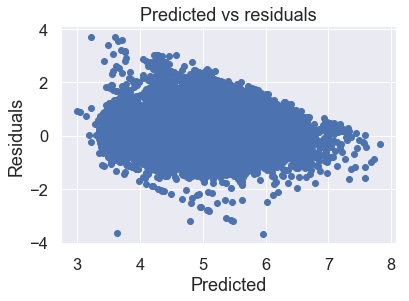

In [57]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

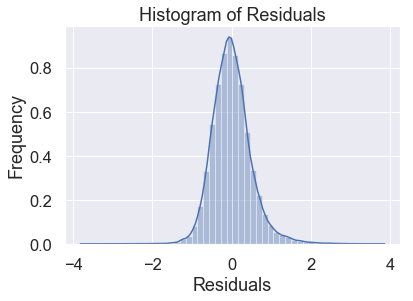

In [58]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

For test data

In [59]:
# Predicting Test data with the model
y_test_pred = lr.predict(X_test)

In [60]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5346622740443429
Adjusted R^2: 0.5340964756744968
MAE: 0.3681964987437045
MSE: 0.23905604139101544
RMSE: 0.48893357564296547


# DecisionTree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [63]:
params = {"criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          "max_depth": [1,10,20],
       "max_features": ["auto", "sqrt", "log2"]
         }
gs_DT = GridSearchCV(estimator=DecisionTreeRegressor(),
                      param_grid=params,
                      cv=5)
gs_DT.fit(X_train, y_train)
gs_DT.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'auto'}

In [64]:
gs_DT.best_score_

0.5066158996081678

In [65]:
# Create a DecisionTree regressor with best parameters
DT = DecisionTreeRegressor(criterion= "squared_error",max_depth= 3,max_features= "auto")

# Train the model using the training sets 
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto')

Model Evaluation

In [66]:
# Model prediction on train data
y_pred = DT.predict(X_train)

In [67]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5084657502826667
Adjusted R^2: 0.5083164712920492
MAE: 0.3791137252130565
MSE: 0.25307399699507077
RMSE: 0.5030646051900995


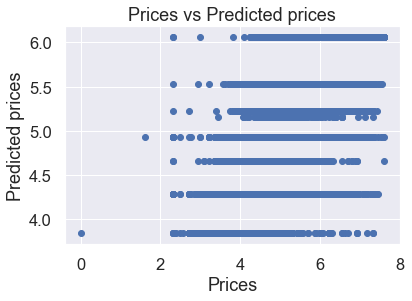

In [68]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

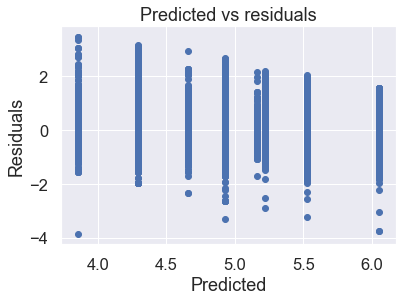

In [69]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [71]:
# Predicting Test data with the model
y_test_pred = DT.predict(X_test)

In [72]:
# Model Evaluation
acc_dt = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_dt)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5082582340352324
Adjusted R^2: 0.5076603313206035
MAE: 0.37851276977809406
MSE: 0.25262048056977526
RMSE: 0.5026136494065548


If no Max Depth is defined, the tree is stretched until it reaches the last leaf node. As a result, by lowering this meter, we can prevent the tree from learning all training samples and therefore avoid overfitting.

# Random Forest Regressor

Train the model

In [49]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [51]:
from sklearn.model_selection import GridSearchCV

params = {
        'max_depth': [80, 90, 100],
     'max_features': [2, 3],
     'n_estimators': [100, 200, 300]
}
gs_RF = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=params,
                      cv=5)
gs_RF.fit(X_train, y_train)
gs_RF.best_params_

{'max_depth': 100, 'max_features': 3, 'n_estimators': 300}

In [52]:
# Create a Random Forest Regressor
RF = RandomForestRegressor(n_estimators= 300,max_depth= 100,max_features= 3)

# Train the model using the training sets 
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features=3, n_estimators=300)

Model Evaluation

In [53]:
# Model prediction on train data
y_pred = RF.predict(X_train)

In [55]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9587422014729743
Adjusted R^2: 0.95872967147629
MAE: 0.10515689056311837
MSE: 0.021242214528196586
RMSE: 0.14574709097678962


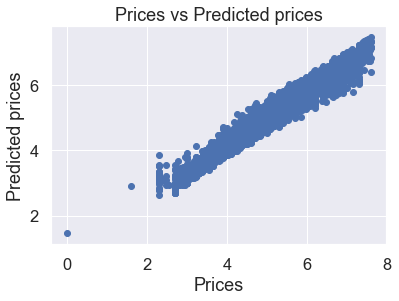

In [56]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

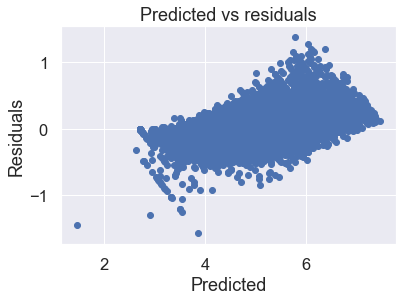

In [57]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [59]:
# Predicting Test data with the model
y_test_pred = RF.predict(X_test)

In [60]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7033602309034087
Adjusted R^2: 0.7029995502871065
MAE: 0.28230701846867884
MSE: 0.1523915319217713
RMSE: 0.39037357994845306


# SVM Regressor

In [137]:
from sklearn import svm
svm.SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
        'C': [0.1,1,10],
    'gamma': [1,0.1,0.01]
}
gs_SVM = GridSearchCV(estimator=svm.SVR(),
                      param_grid=params,
                      cv=3)
gs_SVM.fit(X_train, y_train)
gs_SVM.best_params_

In [311]:
# Create a suport Vector Machine Regressor
svmRegressor = svm.SVR(C= 300,gamma= 100,kernel= 3)

# Train the model using the training sets 
svmRegressor.fit(X_train, y_train)

Model Evaluation

In [313]:
# Model prediction on train data
y_pred = svmRegressor.predict(X_train)

In [314]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6493533257454697
Adjusted R^2: 0.6492468343226925
MAE: 0.30987822322813474
MSE: 0.18053585368192357
RMSE: 0.42489510903506944


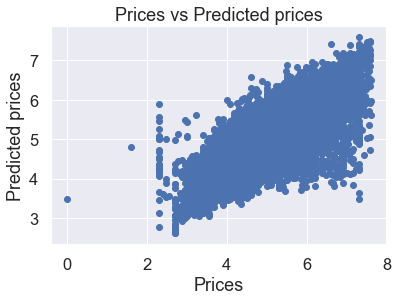

In [315]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

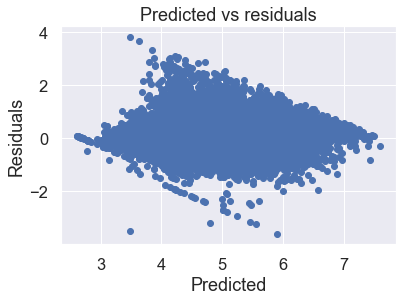

In [316]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [317]:
# Predicting Test data with the model
y_test_pred = svmRegressor.predict(X_test)

In [318]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.60058691503312
Adjusted R^2: 0.6001012736166512
MAE: 0.3366052365736537
MSE: 0.20518884596314527
RMSE: 0.45297775437999743


# XGBoost Regressor

Training the model

In [51]:
from xgboost import XGBRegressor
XGBRegressor().get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [55]:
from sklearn.model_selection import GridSearchCV
params = {
       'learning_rate': [0.1,0.3,0.5], #so called `eta` value
           'max_depth': [7,8,9]
             }

gs_XGB = GridSearchCV(estimator=XGBRegressor(),
                      param_grid=params,
                      cv=3)
gs_XGB.fit(X_train, y_train)
gs_XGB.best_params_

{'learning_rate': 0.1, 'max_depth': 8}

In [56]:
# Create a XGB Regressor
xgbRegressor = XGBRegressor(learning_rate= 0.1,max_depth= 8)

# Train the model using the training sets 
xgbRegressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Model Evaluation

In [81]:
# Model prediction on train data
y_pred = xgbRegressor.predict(X_train)

In [82]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7928372709210378
Adjusted R^2: 0.7927743555837886
MAE: 0.23954908500590247
MSE: 0.1066609293382291
RMSE: 0.32658984879850306


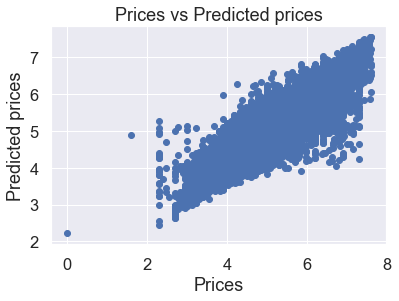

In [83]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

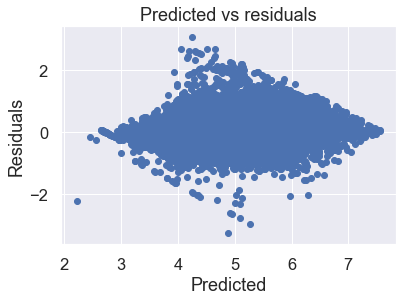

In [84]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [85]:
#Predicting Test data with the model
y_test_pred = xgbRegressor.predict(X_test)

In [86]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7171403721831917
Adjusted R^2: 0.7167964466697695
MAE: 0.2761207907610071
MSE: 0.14531231646081
RMSE: 0.3811985263098613


# Gradient Boosting Regressor

Training the model

In [64]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [73]:
params={
     'n_estimators':[2000, 3000,4000], 
    'learning_rate':[0.1, 0.5. 0.7]
} 
gs_GB = GridSearchCV(estimator=GradientBoostingRegressor(),
                      param_grid=params,
                      cv=3)
gs_GB.fit(X_train, y_train)
gs_GB.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

In [74]:
# Create a Gradient Boosting Regressor
gbRegressor = GradientBoostingRegressor(learning_rate= 0.1,n_estimators= 2000)

# Train the model using the training sets 
gbRegressor.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2000)

In [75]:
#Model prediction on train data
y_pred = gbRegressor.predict(X_train)

In [76]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7698119370470127
Adjusted R^2: 0.7697420289140401
MAE: 0.25251801276228747
MSE: 0.11851587795879119
RMSE: 0.3442613512417437


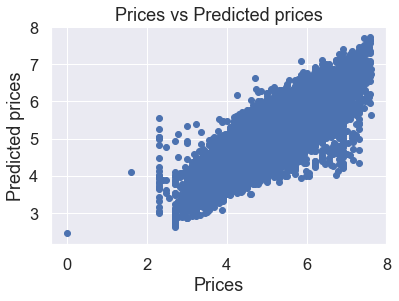

In [77]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

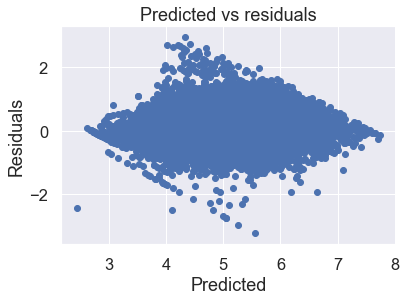

In [78]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [79]:
#Predicting Test data with the model
y_test_pred = gbRegressor.predict(X_test)

In [80]:
# Model Evaluation
acc_grb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_grb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7149582536053681
Adjusted R^2: 0.7146116748810298
MAE: 0.2775819844437742
MSE: 0.14643332728792274
RMSE: 0.38266607804706537


# Neural Netwrok

Training the model

We will now be creating our neural network model. The first thing done is import libraries and initializing the classifier/model. Then, each layer of the network is added with the specified number of nuerons (units) and the activation function used. It is standard to use rectified linear unit for all hidden layers. After the architecture is added, the network is compiled. Since this is regression problem, the loss function and metrics (scoring method) will relate to distance from the networks guess to the actual value.

In order to use GridSearchCV easily, we need to create a function that would assemble the achitecture of the neural network. Nothing much is new, except including an optimizer parameter as it is a parameter we might want to tune/change, and it is the only hyperparameter that has to be changed in the architecture of the network.

In [122]:
import keras
from keras.models import Sequential
from keras.layers import Dense
def buildModel(optimizer):
    # Initialising the ANN
    nnRegressor = Sequential()
    
    # Adding the input layer and the first hidden layer
    nnRegressor.add(Dense(units = 128, activation = 'relu'))
    
    # Adding the second hidden layer
    nnRegressor.add(Dense(units = 64, activation = 'relu'))
    
    
    nnRegressor.add(Dense(units = 32, activation = 'relu'))
    
    # Adding the output layer
    nnRegressor.add(Dense(units = 1, activation = 'linear'))
    
    # Compiling the ANN
    nnRegressor.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    
    return nnRegressor

In [124]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

nnRegressor = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = nnRegressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 3)
grid_search = grid_search.fit(X_train.values, y_train.values, verbose = 0)

In [125]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 128, 'epochs': 150, 'optimizer': 'adam'}


Training the ANN model with the best parameters:

In [127]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
nnRegressor = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
nnRegressor.add(Dense(units=5, input_dim=18, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
nnRegressor.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
nnRegressor.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
nnRegressor.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
nnRegressor.fit(X_train, y_train ,batch_size = 128, epochs = 150, verbose=1)

Epoch 1/150
59288/59288 [==============================] - 48s 802us/step - loss: 12.4949
Epoch 2/150
59288/59288 [==============================] - 1s 25us/step - loss: 2.8501
Epoch 3/150
59288/59288 [==============================] - 1s 25us/step - loss: 0.7567
Epoch 4/150
59288/59288 [==============================] - 1s 25us/step - loss: 0.5258
Epoch 5/150
59288/59288 [==============================] - 1s 25us/step - loss: 0.5150
Epoch 6/150
59288/59288 [==============================] - 1s 24us/step - loss: 0.5149
Epoch 7/150
59288/59288 [==============================] - 2s 26us/step - loss: 0.5149
Epoch 8/150
59288/59288 [==============================] - 2s 26us/step - loss: 0.5149
Epoch 9/150
59288/59288 [==============================] - 2s 27us/step - loss: 0.5149
Epoch 10/150
59288/59288 [==============================] - 1s 25us/step - loss: 0.5149
Epoch 11/150
59288/59288 [==============================] - 1s 24us/step - loss: 0.5149
Epoch 12/150
59288/59288 [============

59288/59288 [==============================] - 1s 24us/step - loss: 0.5142
Epoch 94/150
59288/59288 [==============================] - 2s 25us/step - loss: 0.5147
Epoch 95/150
59288/59288 [==============================] - 2s 26us/step - loss: 0.5145
Epoch 96/150
59288/59288 [==============================] - 1s 23us/step - loss: 0.5146
Epoch 97/150
59288/59288 [==============================] - 1s 24us/step - loss: 0.5145
Epoch 98/150
59288/59288 [==============================] - 1s 24us/step - loss: 0.5146
Epoch 99/150
59288/59288 [==============================] - 1s 24us/step - loss: 0.5144
Epoch 100/150
59288/59288 [==============================] - 1s 25us/step - loss: 0.5144
Epoch 101/150
59288/59288 [==============================] - 1s 24us/step - loss: 0.5142
Epoch 102/150
59288/59288 [==============================] - 1s 24us/step - loss: 0.5136
Epoch 103/150
59288/59288 [==============================] - 1s 24us/step - loss: 0.4949
Epoch 104/150
59288/59288 [==============

In [128]:
#Model prediction on train data
y_pred = nnRegressor.predict(X_train)

In [129]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.4443758873414565
Adjusted R^2: 0.44420714425438135
MAE: 0.4002787569578237
MSE: 0.2860716523786492
RMSE: 0.5348566652652365


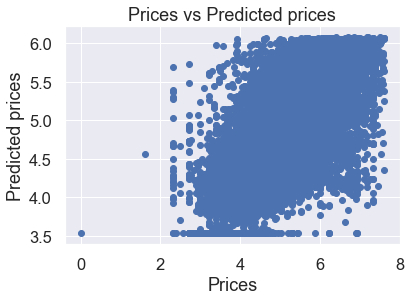

In [130]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [131]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

MemoryError: Unable to allocate 26.2 GiB for an array with shape (59288, 59288) and data type float64

For test data

In [132]:
#Presdicting Test data with the model
y_test_pred = nnRegressor.predict(X_test)

In [133]:
# Model Evaluation
acc_nn = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_nn)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.43708683415562843
Adjusted R^2: 0.4364023950185574
MAE: 0.40376151112796715
MSE: 0.28918307192325693
RMSE: 0.5377574471109228


# Gaussian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [79]:
from sklearn.model_selection import GridSearchCV
X_train=X_train.astype('int')
y_train=y_train.astype('int')
params={
     'var_smoothing': [0.0000001,0.000000001,0.0000000001], 
    'priors':[None]
} 
gs_GNB = GridSearchCV(estimator=GaussianNB(),
                      param_grid=params,
                      cv=3)
gs_GNB.fit(X_train, y_train)
gs_GNB.best_params_

{'priors': None, 'var_smoothing': 1e-09}

In [80]:
# Create a Gaussian Naive Bayes
gnbRegressor = GaussianNB(var_smoothing= 0.000000001,priors= None)

# Train the model using the training sets 
gnbRegressor.fit(X_train, y_train)

GaussianNB()

Model Evaluation

In [81]:
# Model prediction on train data
y_pred = gnbRegressor.predict(X_train)

In [83]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.13440476381432986
Adjusted R^2: 0.13414188247245906
MAE: 0.4401396572662259
MSE: 0.5152307380920254
RMSE: 0.7177957495639169


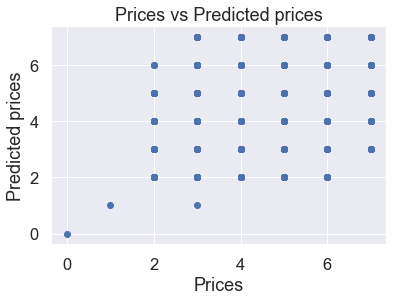

In [84]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

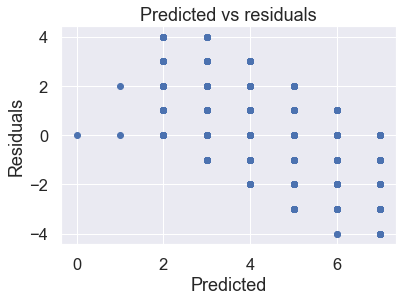

In [86]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [87]:
#Predicting Test data with the model
y_test_pred = gnbRegressor.predict(X_test)

In [89]:
# Model Evaluation
acc_gnb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_gnb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: -0.40436397059918794
Adjusted R^2: -0.4060715193340423
MAE: 0.6704823766424287
MSE: 0.7214581426729235
RMSE: 0.8493869216516837


# Conclusion

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree','Random Forest', 'Support Vector Machines', 'XGBoost', 'Gradient Boosting','Neural Networks'],
    'R-squared Score': [acc_linreg*100, acc_dr*100, acc_rf*100, acc_svm*100, acc_xgb*100, acc_grb*100, acc_nn*100 ]})
models.sort_values(by='R-squared Score', ascending=False)
